## Capítulo 5 – Resampling  
### Ejercicios 5.4 – Parte conceptual

---

### 1. Demostrar que la fórmula (5.6) minimiza Var(αX + (1 − α)Y)

Queremos combinar dos estimadores X y Y de un mismo parámetro:

Z(α) = α X + (1 − α) Y

Buscamos el valor de α que minimiza la varianza de Z(α).

Usamos la propiedad:

Var(aX + bY) = a^2 Var(X) + b^2 Var(Y) + 2ab Cov(X, Y)

Entonces:

Var(Z(α)) =
  α^2 Var(X)
+ (1 − α)^2 Var(Y)
+ 2 α (1 − α) Cov(X, Y)

Llamemos:
- sigma_X2 = Var(X)
- sigma_Y2 = Var(Y)
- sigma_XY = Cov(X, Y)

La función a minimizar es:

V(α) = α^2 * sigma_X2
     + (1 − α)^2 * sigma_Y2
     + 2 α (1 − α) * sigma_XY

Desarrollando (1 − α)^2 = 1 − 2α + α^2 y agrupando términos en α, V(α) queda como un polinomio cuadrático en α.  
Derivamos V(α) respecto a α, igualamos a 0 y despejamos α:

V’(α) = 0  ⇒

α * (sigma_X2 + sigma_Y2 − 2 sigma_XY) = sigma_Y2 − sigma_XY

Por lo tanto,

α* = (sigma_Y2 − sigma_XY) / (sigma_X2 + sigma_Y2 − 2 sigma_XY)

Ese α* es el que aparece en la ecuación (5.6) y es el que minimiza Var(αX + (1 − α)Y).

### 2. Probabilidad de que una observación pertenezca a una muestra bootstrap

Tenemos n observaciones y tomamos una muestra bootstrap de tamaño n con reemplazo.

**(a)** Probabilidad de que la primera observación del bootstrap NO sea la observación j:

En una extracción, la probabilidad de elegir j es 1/n, por lo tanto

P(no j) = 1 − 1/n

**(b)** La misma lógica aplica a la segunda extracción (y a cualquiera): sigue siendo

P(no j) = 1 − 1/n

**(c)** Para que la observación j no aparezca en toda la muestra bootstrap,
ninguna de las n extracciones debe ser j:

P(j no aparece) = (1 − 1/n)^n

**(d, e, f)** La probabilidad de que j sí aparezca al menos una vez es:

P(j aparece) = 1 − (1 − 1/n)^n

- n = 5:  
  (1 − 1/5)^5 = (4/5)^5 ≈ 0.3277  
  ⇒ P(j aparece) ≈ 1 − 0.3277 = 0.6723

- n = 100:  
  (1 − 1/100)^100 ≈ e^(−1) ≈ 0.368  
  ⇒ P(j aparece) ≈ 1 − e^(−1) ≈ 0.632

- n = 10,000:  
  (1 − 1/10000)^10000 también se aproxima a e^(−1)  
  ⇒ P(j aparece) ≈ 0.632

Conclusión: al crecer n, la probabilidad de que una observación dada NO aparezca se acerca a 0.368 y la de que SÍ aparezca se acerca a 0.632.

**(g)** Si graficamos P(j aparece) para n = 1,2,…,100000, la curva sube rápidamente
y se aplana cerca de 0.632. Eso explica por qué en promedio un bootstrap contiene alrededor del 63% de las observaciones distintas.

**(h)** En la simulación propuesta con n = 100 y j = 4, hacemos muchas muestras bootstrap, y en cada una registramos si aparece la observación j.  
El promedio de store (np.mean(store)) nos da una estimación de la probabilidad.  
El valor obtenido será cercano a ~0.63, lo que coincide con el resultado teórico.

### 3. k-fold cross-validation

**(a) Cómo se implementa**

1. Se divide el conjunto de datos en k partes (folds) de tamaño similar.
2. Para cada fold l:
   - Se entrena el modelo usando los otros k − 1 folds.
   - Se calcula el error (MSE, error de clasificación, etc.) en el fold l.
3. El error de k-fold CV es el promedio de los errores en los k folds.

**(b) Ventajas y desventajas**

Comparado con el validation set approach:

- Ventaja: usa todos los datos para entrenar y validar (en diferentes rondas), por lo que el estimador del error de prueba tiene menor varianza y se aprovechan mejor los datos.
- Desventaja: hay que entrenar el modelo k veces, lo cual es más costoso computacionalmente.

Comparado con LOOCV (leave-one-out):

- Ventajas:
  - Requiere muchos menos ajustes de modelo (k en lugar de n).
  - Suele tener menor varianza en la estimación del error que LOOCV.
- Desventajas:
  - En cada ajuste se deja fuera más de una observación, por lo que el estimador puede tener un poco más de sesgo que LOOCV.

En la práctica, k = 5 o k = 10 suelen funcionar muy bien.

### 4. Estimar la desviación estándar de una predicción usando bootstrap

Queremos predecir Y_hat para un valor específico de X usando algún método de aprendizaje estadístico, y estimar la desviación estándar (incertidumbre) de esa predicción.

Con bootstrap podemos hacerlo así:

1. A partir del conjunto de entrenamiento original, generamos B muestras bootstrap (mismo tamaño, con reemplazo).
2. Para cada muestra bootstrap:
   - Volvemos a entrenar el modelo.
   - Calculamos la predicción Y_hat^(b) para el mismo valor de X.
3. Obtenemos B predicciones: Y_hat^(1), Y_hat^(2), …, Y_hat^(B).
4. Calculamos la desviación estándar muestral de esos valores Y_hat^(b).

Esa desviación estándar es una estimación de la variabilidad de la predicción debida a la variabilidad de los datos de entrenamiento.

## Capítulo 5 – Resampling
### Ejercicios 5.4 – Parte práctica

---
### Ejercicio 5 – Default, validation set con regresión logística

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar datos 
Default = pd.read_csv("Default.csv")

# Convertir variables a numéricas
Default['default_bin'] = (Default['default'] == 'Yes').astype(int)
Default['student_bin'] = (Default['student'] == 'Yes').astype(int)

# (a) Modelo logístico con income y balance
X_ab = Default[['income', 'balance']]
y = Default['default_bin']

logit_ab = LogisticRegression(max_iter=1000)
logit_ab.fit(X_ab, y)

print("Coeficientes (income, balance):", logit_ab.coef_, "Intercepto:", logit_ab.intercept_)

# Función auxiliar para validation set error
def validation_error(X, y, test_size=0.5, random_state=0):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    error = 1 - accuracy_score(y_val, y_pred)
    return error


# (b) Una estimación de error con validation set
err1 = validation_error(X_ab, y, test_size=0.5, random_state=1)
print("Validation set error (split 1):", err1)

# (c) Repetir con 3 splits distintos
err2 = validation_error(X_ab, y, test_size=0.5, random_state=2)
err3 = validation_error(X_ab, y, test_size=0.5, random_state=3)
print("Validation set error (split 2):", err2)
print("Validation set error (split 3):", err3)

# (d) Agregar dummy de student
X_ab_s = Default[['income', 'balance', 'student_bin']]

err1_s = validation_error(X_ab_s, y, test_size=0.5, random_state=1)
err2_s = validation_error(X_ab_s, y, test_size=0.5, random_state=2)
err3_s = validation_error(X_ab_s, y, test_size=0.5, random_state=3)
print("Validation error con student (split 1):", err1_s)
print("Validation error con student (split 2):", err2_s)
print("Validation error con student (split 3):", err3_s)


Coeficientes (income, balance): [[2.08089741e-05 5.64710265e-03]] Intercepto: [-11.54046792]
Validation set error (split 1): 0.025000000000000022
Validation set error (split 2): 0.024800000000000044
Validation set error (split 3): 0.024800000000000044
Validation error con student (split 1): 0.0262
Validation error con student (split 2): 0.025000000000000022
Validation error con student (split 3): 0.0252


---
### Ejercicio 6 – Bootstrap para errores estándar en Default

In [7]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Cargar datos
Default = pd.read_csv("Default.csv")
Default['default_bin'] = (Default['default'] == 'Yes').astype(int)

y = Default['default_bin'].values
X = Default[['income', 'balance']].values
X_sm = sm.add_constant(X)  # agrega intercepto

# (a) SE con sm.GLM
glm_bin = sm.GLM(y, X_sm, family=sm.families.Binomial())
glm_res = glm_bin.fit()
print(glm_res.summary())
se_glm = glm_res.bse  # errores estándar [intercepto, income, balance]
print("SE GLM income y balance:", se_glm[1:])

# (b) Función boot_fn
def boot_fn(data, index):
    d = data.iloc[index]
    y_b = (d['default'] == 'Yes').astype(int).values
    X_b = d[['income', 'balance']].values
    X_b = sm.add_constant(X_b)
    glm_b = sm.GLM(y_b, X_b, family=sm.families.Binomial())
    res_b = glm_b.fit()
    # regresamos coef income y balance
    return res_b.params[1], res_b.params[2]

# (c) Bootstrap para SE
rng = np.random.default_rng(123)
B = 1000
boot_coefs = np.empty((B, 2))

for b in range(B):
    idx = rng.integers(0, len(Default), size=len(Default))
    boot_coefs[b, :] = boot_fn(Default, idx)

se_boot = boot_coefs.std(axis=0)
print("Bootstrap SE income y balance:", se_boot)

# (d) Comparación
print("SE GLM income, balance :", se_glm[1:])
print("SE Boot income, balance:", se_boot)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Thu, 27 Nov 2025   Deviance:                       1579.0
Time:                        23:07:30   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

---
### Ejercicio 7 – LOOCV “a mano” con Weekly

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Cargar Weekly desde el ISLP repository
Weekly = pd.read_csv('Weekly.csv')

# Convertir Direction a 0/1
Weekly['Direction_bin'] = (Weekly['Direction'] == 'Up').astype(int)

y = Weekly['Direction_bin'].values
X = Weekly[['Lag1', 'Lag2']].values
X_sm = sm.add_constant(X)
n = len(Weekly)

# (a) Ajuste usando todos los datos
model_all = sm.Logit(y, X_sm).fit(disp=False)
print(model_all.summary())

# (b) Ajuste sin la primera observación
X_minus1 = np.delete(X_sm, 0, axis=0)
y_minus1 = np.delete(y, 0)
model_minus1 = sm.Logit(y_minus1, X_minus1).fit(disp=False)

# (c) Predicción para la primera observación
p1 = model_minus1.predict(X_sm[0, :][None, :])[0]
pred1 = 1 if p1 > 0.5 else 0
print("Probabilidad predicha para obs 1:", p1)
print("Clasificación obs 1:", pred1, "Real:", y[0])

# (d) For loop LOOCV
errors = np.zeros(n)

for i in range(n):
    # usar todas menos la i
    X_train = np.delete(X_sm, i, axis=0)
    y_train = np.delete(y, i)
    model_i = sm.Logit(y_train, X_train).fit(disp=False)
    # predecir obs i
    p_i = model_i.predict(X_sm[i, :][None, :])[0]
    y_pred_i = 1 if p_i > 0.5 else 0
    errors[i] = 1 if y_pred_i != y[i] else 0

# (e) LOOCV error
loocv_error = errors.mean()
print("LOOCV error (proporción de errores):", loocv_error)


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                0.005335
Time:                        23:31:12   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
x1            -0.0387      0.026     -1.477      0.140      -0.090       0.013
x2             0.0602      0.027      2.270      0.0

---
### Ejercicio 8 – Datos simulados y LOOCV para modelos polinomiales

n = 100 p = 1
Modelo generador: y = x - 2 x^2 + ruido normal


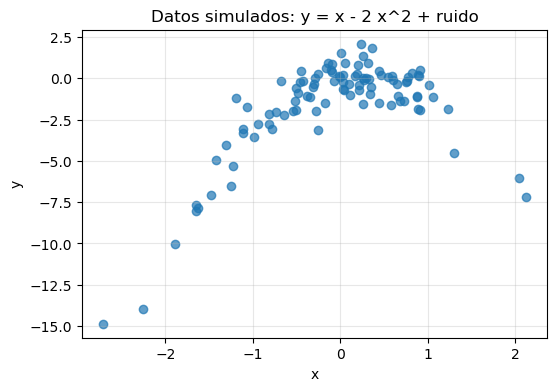

Grado 1, LOOCV MSE: 6.633029839181983
Grado 2, LOOCV MSE: 1.122936856341968
Grado 3, LOOCV MSE: 1.3017965489358856
Grado 4, LOOCV MSE: 1.3323942694179332
(Repetición) Grado 1, LOOCV MSE: 6.633029839181983
(Repetición) Grado 2, LOOCV MSE: 1.122936856341968
(Repetición) Grado 3, LOOCV MSE: 1.3017965489358856
(Repetición) Grado 4, LOOCV MSE: 1.3323942694179332

Resumen modelo polinomial grado 1:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.04e-09
Time:                        23:32:14   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:       

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# (a) Generar datos
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

n = len(x)
p = 1  # solo un predictor original (x)
print("n =", n, "p =", p)
print("Modelo generador: y = x - 2 x^2 + ruido normal")

# (b) Gráfica de dispersión
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos simulados: y = x - 2 x^2 + ruido")
plt.grid(True, alpha=0.3)
plt.show()

# Función para LOOCV MSE con modelo polinomial de grado d
def loocv_mse(x, y, degree):
    X = x.reshape(-1, 1)
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    loo = LeaveOneOut()
    sq_errors = []

    for train_idx, test_idx in loo.split(X_poly):
        X_train, X_test = X_poly[train_idx], X_poly[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        sq_errors.append((y_test - y_pred)**2)

    return np.mean(sq_errors)

# (c) LOOCV para grados 1–4 con semilla 1
np.random.seed(1)
for d in [1, 2, 3, 4]:
    mse_d = loocv_mse(x, y, degree=d)
    print(f"Grado {d}, LOOCV MSE:", mse_d)

# (d) Repetir con otra semilla
np.random.seed(123)
for d in [1, 2, 3, 4]:
    mse_d = loocv_mse(x, y, degree=d)
    print(f"(Repetición) Grado {d}, LOOCV MSE:", mse_d)

# (f) Ajustar modelos con OLS y revisar significancia
for d in [1, 2, 3, 4]:
    X = x.reshape(-1, 1)
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_sm = sm.add_constant(X_poly)
    model = sm.OLS(y, X_sm).fit()
    print(f"\nResumen modelo polinomial grado {d}:")
    print(model.summary())


---
### Ejercicio 9 – Bootstrap con Boston housing

In [18]:
import numpy as np
import pandas as pd

# Cargar data
Boston = pd.read_excel("Boston Housing Dataset 1978.xlsx")

# Usar solo la columna medv y quitar nulos
medv_series = Boston['MEDV']         
medv_clean = medv_series.dropna()      # quitamos filas con NaN
medv = medv_clean.values              
n = len(medv)

# (a) Media
mu_hat = medv.mean()                 
print("Media estimada de medv (mu_hat):", mu_hat)

# (b) SE clásico de la media
std_medv = medv.std(ddof=1)
se_mu = std_medv / np.sqrt(n)
print("SE clásico de mu_hat:", se_mu)

# (c) SE de la media usando bootstrap
rng = np.random.default_rng(1)
B = 1000
boot_means = np.empty(B)

for b in range(B):
    idx = rng.integers(0, n, size=n)
    boot_means[b] = medv[idx].mean()

se_boot_mu = boot_means.std(ddof=1)
print("Bootstrap SE de mu_hat:", se_boot_mu)

# (d) IC 95% aprox con ± 2 SE bootstrap
ci_low = mu_hat - 2 * se_boot_mu
ci_high = mu_hat + 2 * se_boot_mu
print("IC 95% bootstrap aprox para la media:", (ci_low, ci_high))

# (e) Mediana
mu_med_hat = np.median(medv)
print("Mediana estimada de medv:", mu_med_hat)

# (f) SE de la mediana con bootstrap
boot_medians = np.empty(B)
for b in range(B):
    idx = rng.integers(0, n, size=n)
    boot_medians[b] = np.median(medv[idx])

se_med = boot_medians.std(ddof=1)
print("Bootstrap SE de la mediana:", se_med)

# (g) Percentil 10
mu_01_hat = np.percentile(medv, 10)
print("Percentil 10 estimado de medv:", mu_01_hat)

# (h) SE bootstrap del percentil 10
boot_p10 = np.empty(B)
for b in range(B):
    idx = rng.integers(0, n, size=n)
    boot_p10[b] = np.percentile(medv[idx], 10)

se_p10 = boot_p10.std(ddof=1)
print("Bootstrap SE del percentil 10:", se_p10)


Media estimada de medv (mu_hat): 23.750442477876106
SE clásico de mu_hat: 0.4143217701790208
Bootstrap SE de mu_hat: 0.41207045686389965
IC 95% bootstrap aprox para la media: (22.926301564148307, 24.574583391603905)
Mediana estimada de medv: 21.95
Bootstrap SE de la mediana: 0.3034601754400043
Percentil 10 estimado de medv: 14.5
Bootstrap SE del percentil 10: 0.40139113398584486
